In [40]:
import os 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization,Dropout,Flatten
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

#o-->yes
#1-->No

OneHotEncoder()

In [20]:
data=[]
paths=[]
result=[]

for r,d,f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize([128,128])
    img = np.array(img)
    if img.shape ==(128,128,3):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [21]:
paths=[]
for r,d,f in os.walk(r'brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize([128,128])
    img = np.array(img)
    if img.shape ==(128,128,3):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [31]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [35]:
result=np.array(result)
result=result.reshape(139,2)
result.shape

(139, 2)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle = True, random_state=0)


In [44]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'Adamax')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)       

In [45]:
y_train.shape

(111, 2)

In [77]:
history = model.fit(x_train,y_train,epochs=30,batch_size=40,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/30
3/3 [==============================] - 8s 3s/step - loss: 0.0269 - val_loss: 10.4649
Epoch 2/30
3/3 [==============================] - 8s 3s/step - loss: 0.0063 - val_loss: 9.6257
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 0.0258 - val_loss: 9.1966
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 0.2177 - val_loss: 9.9016
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 0.0432 - val_loss: 11.8109
Epoch 6/30
3/3 [==============================] - 8s 3s/step - loss: 0.0435 - val_loss: 12.3731
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 0.0011 - val_loss: 12.7143
Epoch 8/30
3/3 [==============================] - 9s 3s/step - loss: 0.0133 - val_loss: 12.7849
Epoch 9/30
3/3 [==============================] - 10s 3s/step - loss: 0.0128 - val_loss: 12.5342
Epoch 10/30
3/3 [==============================] - 10s 3s/step - loss: 0.0594 - val_loss: 12.2206
Epoch 11/30
3/3 [=======================

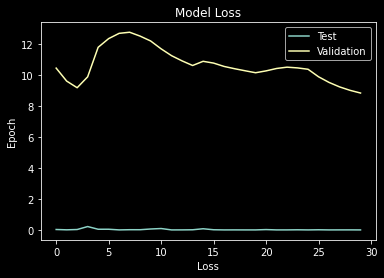

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [87]:
def names(number):
    if(number==0):
        return 'a Tumor'
    else:
        return 'not a Tumor'

100.0% Confidence This Is not a Tumor


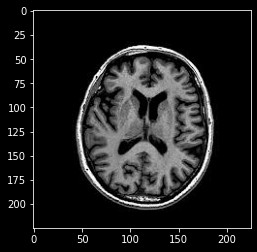

In [93]:
from matplotlib.pyplot import imshow
img = Image.open(r'brain_tumor_dataset/no/37 no.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))


In [98]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf



# Create the GUI window
window = tk.Tk()
window.title("Character Recognition")
window.geometry("1000x700")
def names(number):
    if(number==0):
        return 'a Tumor'
    else:
        return 'not a Tumor'
# Function to preprocess the image and make predictions
def predict_character():
    # Open file dialog to choose an image
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        x = np.array(img.resize((128,128)))
        x = x.reshape(1,128,128,3)
        res=model.predict_on_batch(x)
        classification = np.where(res == np.amax(res))[1][0]


        # Display the predicted character
        result_label.config(text=f"{res[0][classification]*100} % Confidence This Is  {names(classification)}")

        # Display the input image
        img = ImageTk.PhotoImage(Image.open(file_path))
        image_label.config(image=img)
        image_label.image = img

# Create the button for image selection
select_button = tk.Button(window, text="Select Image", command=predict_character)
select_button.pack(pady=10)

# Create label to display the predicted character
result_label = tk.Label(window, text="Predicted Tumor: ")
result_label.pack(pady=10)

# Create label to display the input image
image_label = tk.Label(window)
image_label.pack()


# Start the GUI main loop
window.mainloop()